# Ornstein-Uhlenbeck process

The **Ornstein-Uhlenbeck** process $(X_t : t>0)$ may be defined in terms of a **generator**

$(Lf)(x)=-\alpha xf'(x) + \frac{1}{2} \sigma^2f''(x)$     
$\alpha, \sigma^2 >0$

Given a function $f(X_t)$ we can calculate the **expectation value** via

$\frac{d}{dt}E[f(X_t)]=E[(Lf)(X_t)]\qquad$ (*)

 ----------- *__If interested__*  **(Relating generator to PDE, e.g. as in lectures Brownian motion generator and heat equation)** -----------

**Look at the description on Wikipedia** https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

The article cites the **Fokker-Plank** equation  (heat equation + extra term) as an equivalent description of the process. **How can we relate the two pictures?**

Writing (*)  out explicitly we have

$\frac{d}{dt}\int_{-\infty}^{+\infty}\pi_t(x)f(x) dx=\int_{-\infty}^{+\infty}-\alpha x\pi_t(x)f'(x)+\frac{1}{2}\sigma^2\pi_t(x)f''(x)dx$

**Integrate by parts** on the right hand side (boundary terms cancel as we choose/assume $\pi_t(x), \frac{\partial \pi_t(x)}{\partial x}$ are zero at $\pm \infty$).

First term

$\int_{-\infty}^{+\infty}{-\alpha x\pi_t(x)f'(x)}dx=[-\alpha x\pi_t(x)f(x)]_{-\infty}^{+\infty} - \int_{-\infty}^{+\infty}{f(x)\frac{\partial}{\partial x}(-\alpha x\pi_t(x))}dx=-\int_{-\infty}^{+\infty}{f(x)\frac{\partial}{\partial x}(-\alpha x\pi_t(x))dx}$

Second term

$\int_{-\infty}^{+\infty}\frac{1}{2}\sigma^2\pi_t(x)f''(x)dx=[\frac{1}{2}\sigma^2\pi_t(x)f'(x)]_{-\infty}^{+\infty}-\int_{-\infty}^{+\infty}f'(x)\frac{\partial}{\partial x}(\frac{1}{2}\sigma^2\pi_t(x))dx=-\int_{-\infty}^{+\infty}f'(x)\frac{\partial}{\partial x}(\frac{1}{2}\sigma^2\pi_t(x))dx$

$=-[f(x)\frac{\partial}{\partial x}(\frac{1}{2}\sigma^2\pi_t(x))]_{-\infty}^{+\infty} + \int_{-\infty}^{+\infty}f(x)\frac{\partial^2}{\partial x^2}(\frac{1}{2}\sigma^2\pi_t(x))dx=\int_{-\infty}^{+\infty}f(x)\frac{\partial^2}{\partial x^2}(\frac{1}{2}\sigma^2\pi_t(x))dx$

So in summary

$\frac{d}{dt}\int_{-\infty}^{+\infty}\pi_t(x)f(x) dx=\int_{-\infty}^{+\infty}{f(x)\frac{\partial}{\partial x}(\alpha x\pi_t(x))dx} + \int_{-\infty}^{+\infty}f(x)\frac{\partial^2}{\partial x^2}(\frac{1}{2}\sigma^2\pi_t(x))dx$

We are free to choose any function $f(x)$ so choose $f(x)=\delta(x-y)$, the Dirac-delta 'function'. Use the (defining) property of the delta function 

$\int_{-\infty}^{+\infty}\delta(x-a)g(x)dx=g(a) \qquad \forall \text{ function } g(x)$

*__So we end up with the final PDE (On wikipedia this is called the **Fokker-Plank** representation)__*

$\frac{\partial \pi_t(y)}{\partial t}=\alpha \frac{\partial}{\partial y}(y\pi_t(y))+\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}\pi_t(y)$

If we use the generator for e.g. **Brownian motion** 

$(Lf)(x)= \frac{1}{2} \sigma^2f''(x)$     
$\sigma^2 >0$

and follow similar working we obtain the **heat/diffusion equation** https://en.wikipedia.org/wiki/Heat_equation

$\frac{\partial \pi_t(y)}{\partial t}=\frac{1}{2}\sigma^2\frac{\partial^2}{\partial y^2}\pi_t(y)$

which has solution (taking $\pi_0(y)=\delta(y-x_0)$ i.e. $X_0=x_0$) 

$\pi_t(y)=\frac{1}{\sqrt{2\pi \sigma^2 t}}\exp{\left(\frac{-(y-x_0)^2}{2\sigma^2 t}\right)}$

as stated in lectures (don't worry if you have no idea how to solve that)

i.e. a Gaussian centered on $x_0$ with width (standard deviation) proportional to $\sqrt{t}$ 

Physically this is the characteristic property of a **diffusive process**, where distance traveled is proportional to $\sqrt{t}$ (contrast with a particle moving at uniform velocity distance proportional to $t$). 

----------------------------------------------------------------  *__End if interested__*  ----------------------------------------------------------------

The **Ornstein–Uhlenbeck process** may also be described by a **stochastic differential equation**

$dX_t=-\alpha X_t dt + \sigma dB_t$

where $dB_t \sim N(0,dt)$ 

i.e normally distriuted with zero mean and variance proportional to $dt$, so standard devation proportional to $\sqrt{t}$.

Using a simple finite difference approximation we have

$ X_{t+\Delta t}=X_t -\alpha X_t \Delta t+ \sigma \Delta B_t$

where $\Delta B_t \sim N(0,\Delta t)$

**Lets simulate!**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12) # set default size of plots
plt.rcParams.update({'font.size': 18}) # set default font size

In [76]:
##### Parameter/setup ######

alpha=0.2
sigma=0.4
x0=10.0 # initial condition

tmaxish=40.0 #max time (ish)

dt=0.01 # timestep

np.random.seed(101) # for reproducability 

############################

times=np.arange(0.0,tmaxish,dt) # vector of times
length=np.shape(times)[0]

x=np.zeros(length) # vector to store x values
x[0]=x0

B=np.random.randn(length-1)*np.sqrt(dt) # the gaussian noise

for i in range(0,length-1): # simulate
    x[i+1]=x[i]-alpha*x[i]*dt+sigma*B[i]

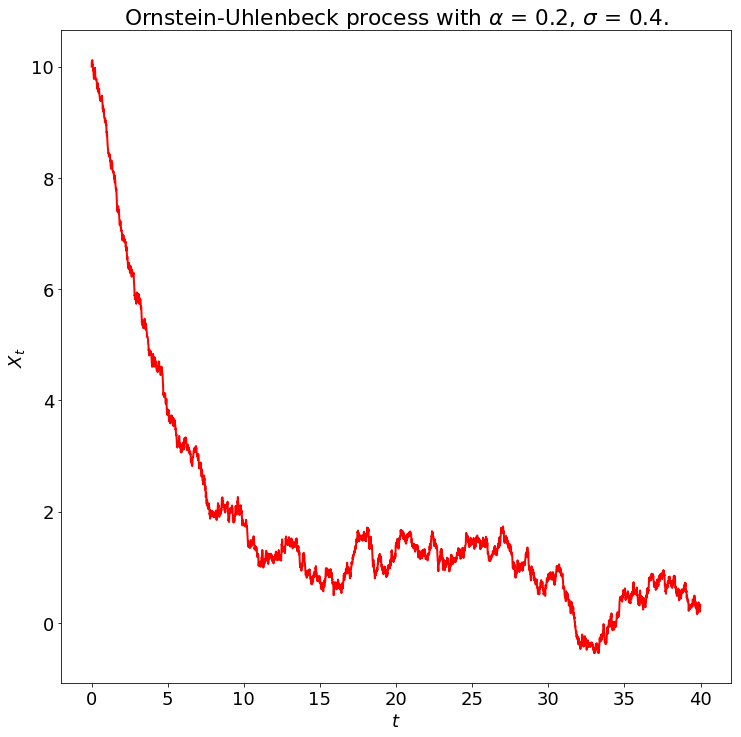

In [77]:
plt.plot(times,x,'r',lw=2)
plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.title(r'Ornstein-Uhlenbeck process with $\alpha$ = {}, $\sigma$ = {}.'.format(alpha,sigma))